# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV# find optimal hyperparameters
import matplotlib.pyplot as plt

# Preprocess data

In [2]:
df = pd.read_csv('mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
# split df to features and target variables
x = df.iloc[:, 0:8]
y = df.iloc[:, -1:]

In [14]:
# split data to train, valid and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [15]:
len(x_train), len(x_valid), len(x_test)

(32421, 10807, 10807)

# Baseline model

In [16]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(x_valid)

# using metrics module for accuracy calculation
print("BASELINE ACCURACY :", metrics.accuracy_score(y_valid, y_pred))

print(classification_report(y_pred, y_valid)) 


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


BASELINE ACCURACY : 0.9893587489590081
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4820
           1       0.99      0.99      0.99      5987

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



# Optimize model

In [7]:
# 1. Use grid search to find the best parameters

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [9]:

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

RandomForestClassifier(max_depth=9, max_leaf_nodes=9)


In [11]:
# update parameters 
model_grid = RandomForestClassifier(max_depth=9, 
                                    max_features="sqrt", 
                                    max_leaf_nodes=9, 
                                    n_estimators=100) 
model_grid.fit(x_train, y_train) 
y_pred_grid = model_grid.predict(x_valid) 
print(classification_report(y_pred_grid, y_valid))
print("ACCURACY :", metrics.accuracy_score(y_valid, y_pred_grid))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.68      0.73      0.70      4461
           1       0.80      0.76      0.78      6346

    accuracy                           0.75     10807
   macro avg       0.74      0.74      0.74     10807
weighted avg       0.75      0.75      0.75     10807

ACCURACY : 0.7462755621356528


In [10]:
# find best parameter by RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_search.fit(x_train, y_train) 
print(random_search.best_estimator_) 

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150)


In [18]:
#update parameters by RandomizedSearchCV
# update parameters 
model_grid2 = RandomForestClassifier(max_depth=6, 
                                    max_features="sqrt", 
                                    max_leaf_nodes=9, 
                                    n_estimators=150) 
model_grid2.fit(x_train, y_train) 
y_pred_grid2 = model_grid2.predict(x_valid) 
print(classification_report(y_pred_grid2, y_valid))
print("ACCURACY :", metrics.accuracy_score(y_valid, y_pred_grid2))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.67      0.73      0.70      4431
           1       0.80      0.75      0.78      6376

    accuracy                           0.74     10807
   macro avg       0.74      0.74      0.74     10807
weighted avg       0.75      0.74      0.75     10807

ACCURACY : 0.7440547793097066


In [19]:
# choose number of trees (n_estimators)
acc = []
for i in range(1, 11):
    model = RandomForestClassifier(n_estimators= 20 * i)
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_valid) 
    acc.append(metrics.accuracy_score(y_valid, y_pred))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

([<matplotlib.axis.XTick at 0x213bb539f90>,
 [Text(2, 0, '40'),
  Text(4, 0, '80'),
  Text(6, 0, '120'),
  Text(8, 0, '160'),
  Text(10, 0, '200')])

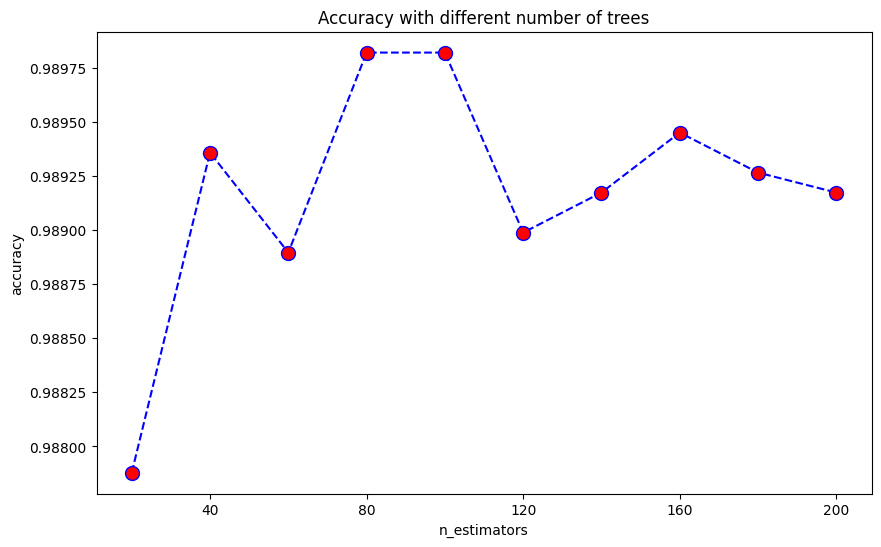

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), acc, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Accuracy with different number of trees')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks=(2, 4, 6, 8, 10), labels=(40, 80, 120, 160, 200))

In [25]:
print("Maximum accuracy : ", max(acc), " with n_estimators = ", (acc.index(max(acc)) + 1) * 20) 

Maximum accuracy :  0.9898214120477469  with n_estimators =  80


# Train the model with the whole train data with the parameters that performs best on valid data 

In [4]:
# split data to train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)


In [5]:
len(x_train), len(x_test)

(43228, 10807)

In [6]:

model = RandomForestClassifier(n_estimators= 80)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) 
print("Final accuracy: ", metrics.accuracy_score(y_test, y_pred))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Final accuracy:  0.9910243360784676
